In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from math import radians, cos, sin, asin, sqrt
%matplotlib inline

In [2]:
from cartopy import config
import cartopy.crs as ccrs


In [3]:
data = pd.read_csv (r'osm_data.csv')
df = pd.DataFrame(data, columns = ['id', 'latitude', 'longitude', 'description'])

In [4]:
# vnf_data = pd.read_csv(r'vnf_2017.csv')
# vnf_df = pd.DataFrame(vnf_data, columns=['id_Key', 'Date_Mscan','Lat_GMTCO','Lon_GMTCO','Temp_BB', 'RHI', 'RH', 'Area_BB', 'Cloud_Mask', 'Sample_M10'])
# vnf_df.drop(vnf_df[vnf_df['Temp_BB'] == 999999].index, inplace = True)
# vnf_lats = vnf_df['Lat_GMTCO']
# vnf_long = vnf_df['Lon_GMTCO']                   

In [5]:
# heat = vnf_df['Temp_BB'].to_numpy()
# marker_size = [2*np.log(s) for s in heat]

In [6]:
of = df.loc[df['description'] == 'oil_field']
lat_of = of['latitude']
long_of = of['longitude']

rig = df.loc[df['description'] == 'rig']
lat_rig = rig['latitude']
long_rig = rig['longitude']

op = df.loc[df['description'] == 'offshore_platform']
lat_op = op['latitude']
long_op = op['longitude']

flare = df.loc[df['description'] == 'flare']
lat_f = flare['latitude']
long_f = flare['longitude']

uk = df.loc[df['description'] == 'unknown']
lat_uk = uk['latitude']
long_uk = uk['longitude']

gf = df.loc[df['description'] == 'gas_field']
lat_gf = gf['latitude']
long_gf = gf['longitude']


In [7]:
plt.rcParams['figure.figsize'] = (20, 20)

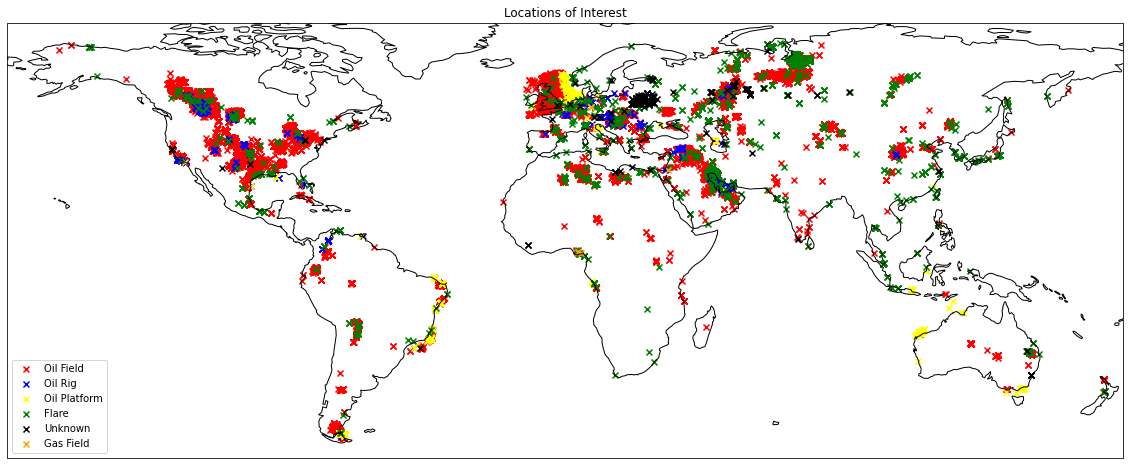

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())

plt.title('Locations of Interest')
ax.coastlines(resolution='110m')
plt.scatter(long_of, lat_of, marker='x', color='red', label='Oil Field')
plt.scatter(long_rig, lat_rig, marker='x', color='blue', label='Oil Rig')
plt.scatter(long_op, lat_op, marker='x', color='yellow', label='Oil Platform')
plt.scatter(long_f, lat_f, marker='x', color='green', label='Flare')
plt.scatter(long_uk, lat_uk, marker='x', color='black', label='Unknown')
plt.scatter(long_gf, lat_gf, marker='x', color='orange', label='Gas Field')
plt.legend()
plt.show()

In [75]:
vnf_data = pd.read_csv(r'close_points.csv')

In [78]:
vnf_lats = vnf_data['Lat_GMTCO']
vnf_long = vnf_data['Lon_GMTCO']

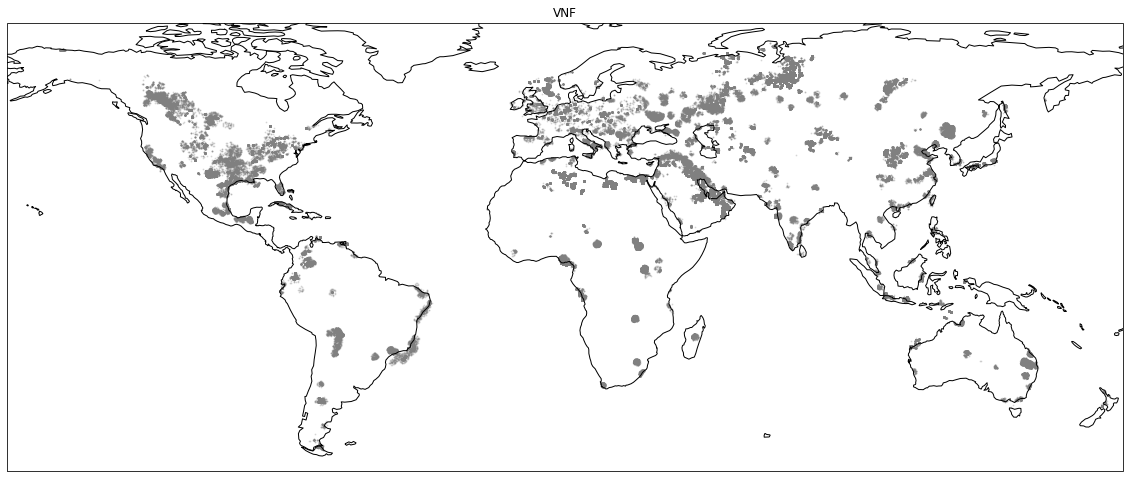

In [79]:
ax2 = plt.axes(projection=ccrs.PlateCarree())
plt.title('VNF')
ax2.coastlines(resolution='110m')
plt.scatter(vnf_long, vnf_lats, marker='o', color='gray', alpha=0.2, label='vnf', s=1)
plt.show()

In [10]:
# vnf_df['points'] = list(zip(vnf_df['Lat_GMTCO'], vnf_df['Lon_GMTCO']))

# df['points'] = list(zip(df['latitude'], df['longitude']))

In [39]:
# def haversine(lon1, lat1, lon2, lat2):
#     """
#     Calculate the great circle distance between two points 
#     on the earth (specified in decimal degrees)
#     """
#     # convert decimal degrees to radians 
#     lon1, lat1, lon2, lat2 = map(np.deg2rad, [lon1, lat1, lon2, lat2])

#     # haversine formula 
#     dlon = lon2 - lon1 
#     dlat = lat2 - lat1 
#     a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
#     c = 2 * np.arcsin(np.sqrt(a)) 
#     r = 6371 # Radius of earth in kilometers. Use 3956 for miles
#     return c * r

# radius = 3.00 # in kilometer

# a = haversine(lon1, lat1, lon2, lat2)

# print('Distance (km) : ', a)
# if a <= radius:
#     print('Inside the area')
# else:
#     print('Outside the area')
    

In [67]:
# vnf_df_head = vnf_df.head(100000)

In [68]:
# close_points_lat = []
# close_points_lon = []
# d = []
# for i in vnf_df_head['points'].values:
#     lat, lon = i 
#     a = haversine(lon, lat, df['longitude'].values, df['latitude'].values) 
#     if a.any() <= radius:
#         d.append(i)
    
    
# new_df = pd.DataFrame(data=d, columns=['Lat_GMTCO', 'Lon_GMTCO'])        

# for i in range(len(df['points'])):
#     for j in range(len(vnf_df['points'])):
#         lat1, lon1 = df['points'][i]
#         lat2, lon2 = vnf_df.points.values[j]
#         a = haversine(lon1, lat1, lon2, lat2)
#         if a <= radius:
#             close_points_lat.append(lat2)
#             close_points_lon.append(lon2)
#             break
            

In [69]:
# new_df = pd.DataFrame(data=d, columns=['Lat_GMTCO', 'Lon_GMTCO'])   

In [70]:
#new_df['points'] = list(zip(new_df['Lat_GMTCO'], new_df['Lon_GMTCO']))

In [71]:
#newdf = pd.DataFrame.merge(vnf_df, new_df, how='inner')

In [72]:
#lat_ = newdf['Lat_GMTCO']
#lon_ = newdf['Lon_GMTCO']

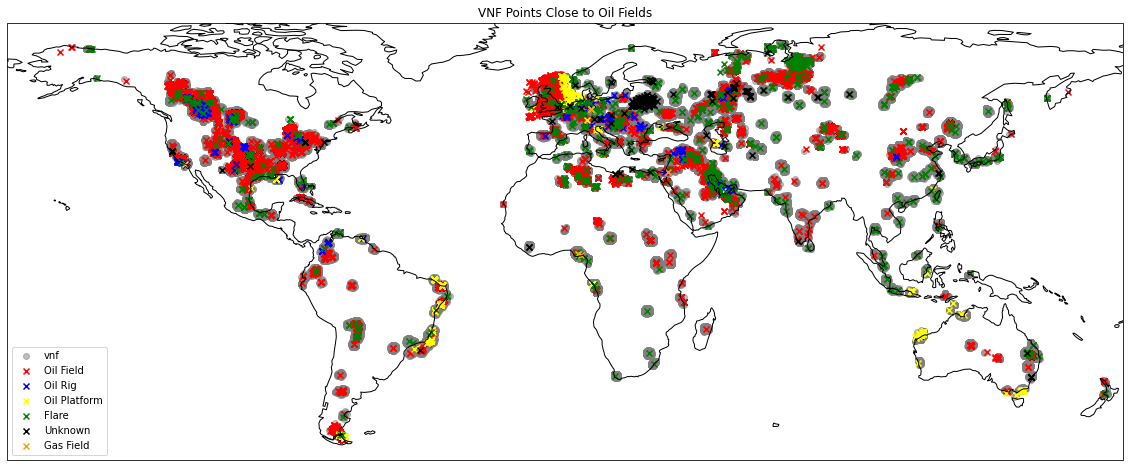

In [88]:
ax3 = plt.axes(projection=ccrs.PlateCarree())
plt.title('VNF Points Close to Oil Fields')
ax3.coastlines(resolution='110m')
plt.scatter(vnf_long, vnf_lats, marker='o', color='gray', alpha=0.5, label='vnf')
plt.scatter(long_of, lat_of, marker='x', color='red', label='Oil Field')
plt.scatter(long_rig, lat_rig, marker='x', color='blue', label='Oil Rig')
plt.scatter(long_op, lat_op, marker='x', color='yellow', label='Oil Platform')
plt.scatter(long_f, lat_f, marker='x', color='green', label='Flare')
plt.scatter(long_uk, lat_uk, marker='x', color='black', label='Unknown')
plt.scatter(long_gf, lat_gf, marker='x', color='orange', label='Gas Field')
plt.legend()
plt.savefig('combined_map.jpeg')
plt.show()

In [85]:
# ax = plt.axes(projection=ccrs.PlateCarree())

# plt.title('Locations of Interest')
# ax.coastlines(resolution='110m')
# plt.scatter(long_of, lat_of, marker='x', color='red', label='Oil Field')
# plt.scatter(long_rig, lat_rig, marker='x', color='blue', label='Oil Rig')
# plt.scatter(long_op, lat_op, marker='x', color='yellow', label='Oil Platform')
# plt.scatter(long_f, lat_f, marker='x', color='green', label='Flare')
# plt.scatter(long_uk, lat_uk, marker='x', color='black', label='Unknown')
# plt.scatter(long_gf, lat_gf, marker='x', color='orange', label='Gas Field')
# plt.scatter(lon_, lat_, marker='o', color='gray', alpha=0.1, label='vnf')
# plt.savefig('combined_map.jpeg')
# plt.legend()
# plt.show()